# Chanterelle Finder
### Nancy Williams



In [19]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd
from osgeo import gdal

matplotlib.rcParams['figure.figsize'] = (8, 5.5)

In [ ]:
# Users define some inputs
home = '400 Broad St, Seattle, WA 98109' # your home address. This is the space needle.
miles_drive = 60 # miles you're willing to drive from your home
distance_hike = 5280 # how many feet are you willing to walk (clim? crawl over stumps and logs) to get to your chanterelle honey hole?
elevation_max = 2000 # we know that chanterelles can grow higher than 200 ft elevation, but 1000-2000 is the sweet spot

***
## Bring in elevation data

In [10]:
dem_path = os.path.join(os.getcwd(), 'NWWashington.tif')
elevation.clip(bounds=(-123.5, 46.5, -121, 48), output=dem_path)

curl -s -o spool/N46/N46W124.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N46/N46W124.hgt.gz && mv spool/N46/N46W124.hgt.gz.temp spool/N46/N46W124.hgt.gz
gunzip spool/N46/N46W124.hgt.gz 2>/dev/null || touch spool/N46/N46W124.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N46/N46W124.hgt cache/N46/N46W124.tif 2>/dev/null || touch cache/N46/N46W124.tif
curl -s -o spool/N47/N47W124.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N47/N47W124.hgt.gz && mv spool/N47/N47W124.hgt.gz.temp spool/N47/N47W124.hgt.gz
gunzip spool/N47/N47W124.hgt.gz 2>/dev/null || touch spool/N47/N47W124.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N47/N47W124.hgt cache/N47/N47W124.tif 2>/dev/null || touch cache/N47/N47W124.tif
curl -s -o spool/N46/N46W123.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N46/N46W123.hgt.gz && mv spool/N46/N46W123.hgt.gz.temp spool/N46/N46W123.

Intro to gdal (it's finnicky, for the meantime we will work around it): https://medium.com/planet-stories/a-gentle-introduction-to-gdal-part-1-a3253eb96082

In [72]:
#gdalinfo('NWWashington.tif')

NameError: name 'gdalinfo' is not defined

/var/folders/77/krt31b_92xg9grw6m3r25r380000mn/T/ipykernel_95047/3599337719.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_array = gdal_data.ReadAsArray().astype(np.float)


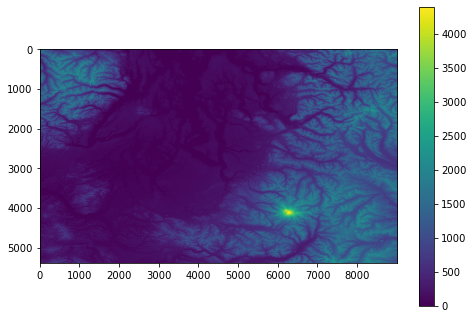

In [69]:
# Another example: https://www.earthdatascience.org/tutorials/python/elevation/
filename = 'NWWashington.tif'
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan
    
NWWA_dem = rd.rdarray(data_array, no_data=-9999)
plt.imshow(NWWA_dem,interpolation='none', vmin=0)
plt.colorbar()
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (rise/run)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.967921


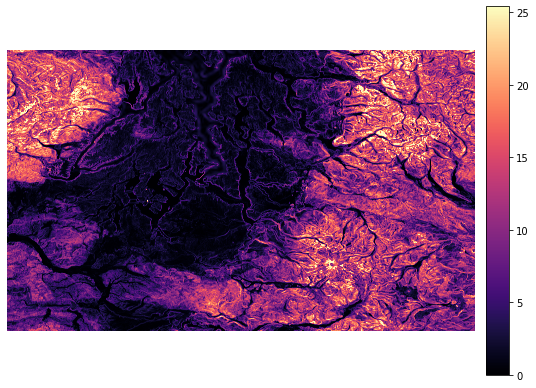

In [71]:
# Calculate the slope
slope = rd.TerrainAttribute(NWWA_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Aspect attribute calculation
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 2.21757


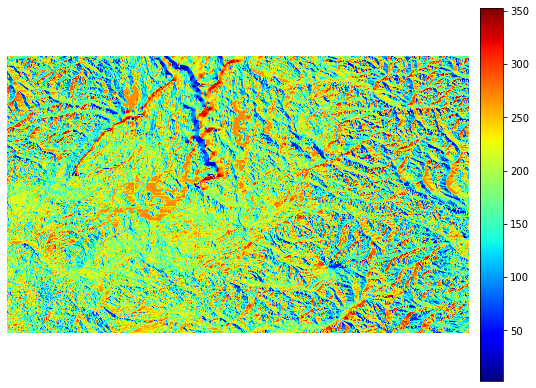

In [51]:
# Calculate the aspect (which way is the slope facing?)
aspect = rd.TerrainAttribute(NWWA_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()

In [68]:
# Next, I would mask out slopes that are not facing south-ish, 
# i.e. where the aspect is greater than 225 deg or less than 135 deg.
# Note that we'll need to add georeferences and a projection
aspect

rdarray([[137.2906  , 118.20163 , 100.0975  , ..., 231.3402  ,
          231.11551 , 223.60281 ],
         [159.04422 , 146.82149 , 134.21518 , ..., 219.22568 ,
          220.60129 , 212.77487 ],
         [168.69006 , 163.16252 , 159.8516  , ..., 216.8699  ,
          216.02737 , 206.30101 ],
         ...,
         [ 46.16914 ,  56.309933,  37.998734, ..., 335.72556 ,
          330.56152 , 340.2011  ],
         [ 51.072456,  57.60861 ,  41.933514, ..., 337.3062  ,
          333.22507 , 339.05734 ],
         [ 51.91123 ,  62.10273 ,  62.878696, ..., 327.5288  ,
          323.47113 , 323.32565 ]], dtype=float32)

***
## Bring in satellite images

Background Reading:
https://www.iges.or.jp/en/publication_documents/pub/peer/en/6898/Ma+et+al+2019.pdf

Data Sources:
Landsat 8 on AWS https://registry.opendata.aws/landsat-8/

Examples:
https://github.com/robmarkcole/satellite-image-deep-learning
https://towardsdatascience.com/neural-network-for-satellite-data-classification-using-tensorflow-in-python-a13bcf38f3e1

Use the Landsat explorer at https://landsatlook.usgs.gov/explore to find the scenes near Seattle. Need to encompass date range from June 1, 2021 - Sept 30, 2021 to get the entire NW washington area covered by at least one pass.

In [5]:
import requests
import itertools

def fetch_sat_api(query):
    '''
    Queries the sat-api (STAC) backend.
    This function handles pagination.
    query is a python dictionary to pass as json to the request.
    '''
    headers = {
        "Content-Type": "application/json",
        "Accept-Encoding": "gzip",
        "Accept": "application/geo+json",
    }

    url = f"https://landsatlook.usgs.gov/sat-api/stac/search"
    data = requests.post(url, headers=headers, json=query).json()
    error = data.get("message", "")
    if error:
        raise Exception(f"SAT-API failed and returned: {error}")

    meta = data.get("meta", {})
    if not meta.get("found"):
        return []
    print(meta)

    features = data["features"]
    if data["links"]:
        curr_page = int(meta["page"])
        query["page"] = curr_page + 1
        query["limit"] = meta["limit"]

        features = list(itertools.chain(features, fetch_sat_api(query)))

    return features

query = {"bbox":[-126.5625,45.08903556483103,-118.125,50.73645513701065],"query":{"collections":["landsat-c2l2-sr","landsat-c2l2-st"],"eo:cloud_cover":{"lte":25},"platform":{"in":["LANDSAT_8"]},"landsat:collection_category":{"in":["T1","T2","RT"]}},"time":"2021-06-01T00:00:00.000/2021-09-30T23:59:59.999","limit":700}

features = fetch_sat_api(query)

{'page': 1, 'limit': 700, 'found': 212, 'returned': 212}


In [6]:
features

[{'type': 'Feature',
  'stac_version': '1.0.0',
  'stac_extensions': ['https://landsat.usgs.gov/stac/landsat-extension/v1.1.1/schema.json',
   'https://stac-extensions.github.io/view/v1.0.0/schema.json',
   'https://stac-extensions.github.io/projection/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json',
   'https://stac-extensions.github.io/alternate-assets/v1.1.0/schema.json',
   'https://stac-extensions.github.io/storage/v1.0.0/schema.json'],
  'id': 'LC08_L2SP_044029_20210929_20211013_02_T1_SR',
  'description': 'Landsat Collection 2 Level-2 Surface Reflectance Product',
  'bbox': [-121.21880773741341,
   43.53959293158958,
   -118.33422939894312,
   45.663131431374964],
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-120.64513568058237, 45.663131431374964],
     [-121.21880773741341, 43.95168762227025],
     [-118.97586839735906, 43.53959293158958],
     [-118.33422939894312, 45.24690641786198],
     [-120.64513568058237, 45.663131431374964]]]

In [ ]:
import os
from pyrsgis import raster

os.chdir("E:\\yourDirectoryName")
mxBangalore = 'l5_Bangalore2011_raw.tif'
builtupBangalore = 'l5_Bangalore2011_builtup.tif'
mxHyderabad = 'l5_Hyderabad2011_raw.tif'

# Read the rasters as array
ds1, featuresBangalore = raster.read(mxBangalore, bands='all')
ds2, labelBangalore = raster.read(builtupBangalore, bands=1)
ds3, featuresHyderabad = raster.read(mxHyderabad, bands='all')